In [1]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
url = 'song_df.csv'
df = pd.read_csv(url)

## Clean df

In [5]:
cluster_df = df
cluster_df = cluster_df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.741,0.520,8,-7.513,1,0.0656,0.45000,0.000002,0.2220,0.3470,102.998,171030,4
1,0.549,0.396,8,-8.435,0,0.4370,0.16800,0.077700,0.1470,0.2840,79.494,141452,4
2,0.885,0.578,5,-7.416,0,0.0783,0.07390,0.090300,0.1020,0.3880,131.999,178933,4
3,0.578,0.655,1,-6.704,0,0.0571,0.35100,0.000009,0.1750,0.4400,124.846,174500,4
4,0.529,0.760,11,-4.781,0,0.2500,0.00491,0.000000,0.3440,0.2760,166.465,209640,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,0.545,0.789,9,-5.164,0,0.0262,0.12000,0.000024,0.7520,0.6630,149.977,239000,4
6782,0.501,0.704,3,-5.640,1,0.0326,0.28400,0.000000,0.1550,0.2700,97.039,203453,4
6783,0.710,0.437,2,-9.239,0,0.0307,0.90200,0.001370,0.1200,0.8630,143.982,257589,4
6784,0.608,0.612,4,-8.346,0,0.0288,0.35800,0.005540,0.0967,0.1990,120.004,256484,4


## Scaling features

In [7]:
scaler = StandardScaler()
scaler.fit(cluster_df)
X_scaled = scaler.transform(cluster_df)
X_scaled_df = pd.DataFrame(X_scaled, columns = cluster_df.columns)
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.714382,-0.969985,0.758425,-0.078561,0.801191,-0.063885,1.094881,-0.270221,0.310982,-1.061320,-0.717547,-1.021546,0.138531
1,-0.578529,-1.674783,0.758425,-0.376091,-1.248142,5.302397,-0.156547,0.310698,-0.208333,-1.325924,-1.626897,-1.482509,0.138531
2,1.684065,-0.640321,-0.069724,-0.047259,-1.248142,0.119615,-0.574133,0.404904,-0.519922,-0.889117,0.404477,-0.898380,0.138531
3,-0.383245,-0.202664,-1.173923,0.182504,-1.248142,-0.186700,0.655550,-0.270170,-0.014456,-0.670713,0.127734,-0.967467,0.138531
4,-0.713207,0.394141,1.586574,0.803057,-1.248142,2.600472,-0.880289,-0.270236,1.155733,-1.359525,1.737938,-0.419822,0.138531


## Clustering the songs with K-Means

In [8]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=1234)

In [9]:
labels = kmeans.labels_
labels

array([1, 3, 5, ..., 1, 1, 1])

In [10]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

Now that we have our model, let's get the clusters and see how many observations each cluster has.

In [11]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1823
1    1041
2    1008
3     417
4     272
5    1649
6     226
7     350
Name: count, dtype: int64

In [12]:
clusters

array([1, 3, 5, ..., 1, 1, 1])

In [13]:
cluster_df["cluster"] = clusters
cluster_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.741,0.520,8,-7.513,1,0.0656,0.45000,0.000002,0.2220,0.3470,102.998,171030,4,1
1,0.549,0.396,8,-8.435,0,0.4370,0.16800,0.077700,0.1470,0.2840,79.494,141452,4,3
2,0.885,0.578,5,-7.416,0,0.0783,0.07390,0.090300,0.1020,0.3880,131.999,178933,4,5
3,0.578,0.655,1,-6.704,0,0.0571,0.35100,0.000009,0.1750,0.4400,124.846,174500,4,5
4,0.529,0.760,11,-4.781,0,0.2500,0.00491,0.000000,0.3440,0.2760,166.465,209640,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6781,0.545,0.789,9,-5.164,0,0.0262,0.12000,0.000024,0.7520,0.6630,149.977,239000,4,7
6782,0.501,0.704,3,-5.640,1,0.0326,0.28400,0.000000,0.1550,0.2700,97.039,203453,4,2
6783,0.710,0.437,2,-9.239,0,0.0307,0.90200,0.001370,0.1200,0.8630,143.982,257589,4,1
6784,0.608,0.612,4,-8.346,0,0.0288,0.35800,0.005540,0.0967,0.1990,120.004,256484,4,1


## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [14]:
kmeans.inertia_

52756.26741015937

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.ginal.

In [15]:
kmeans2 = KMeans(n_clusters=8,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=5,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

53178.30254775439


## Choosing K

Training a K-Means model with 2 clusters! 



C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 3 clusters! 



C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 4 clusters! 



C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 5 clusters! 



C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 



C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 7 clusters! 



C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

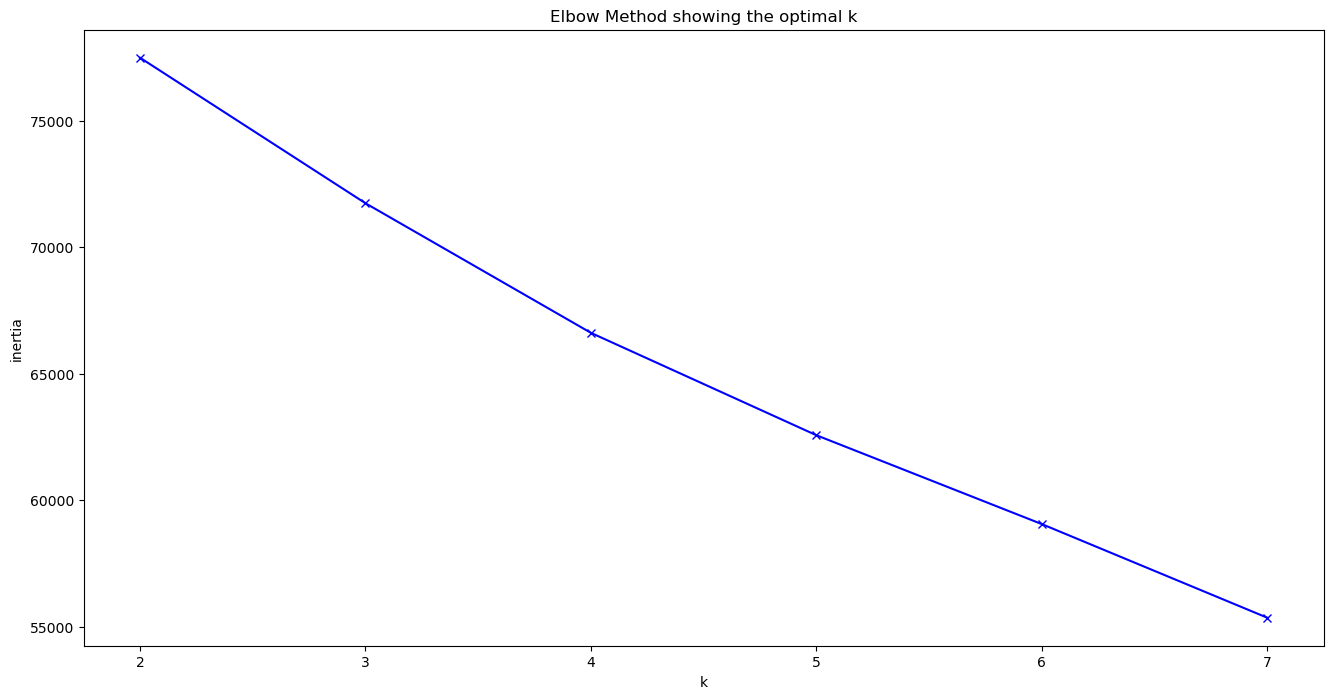

In [16]:
K = range(2, 8)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

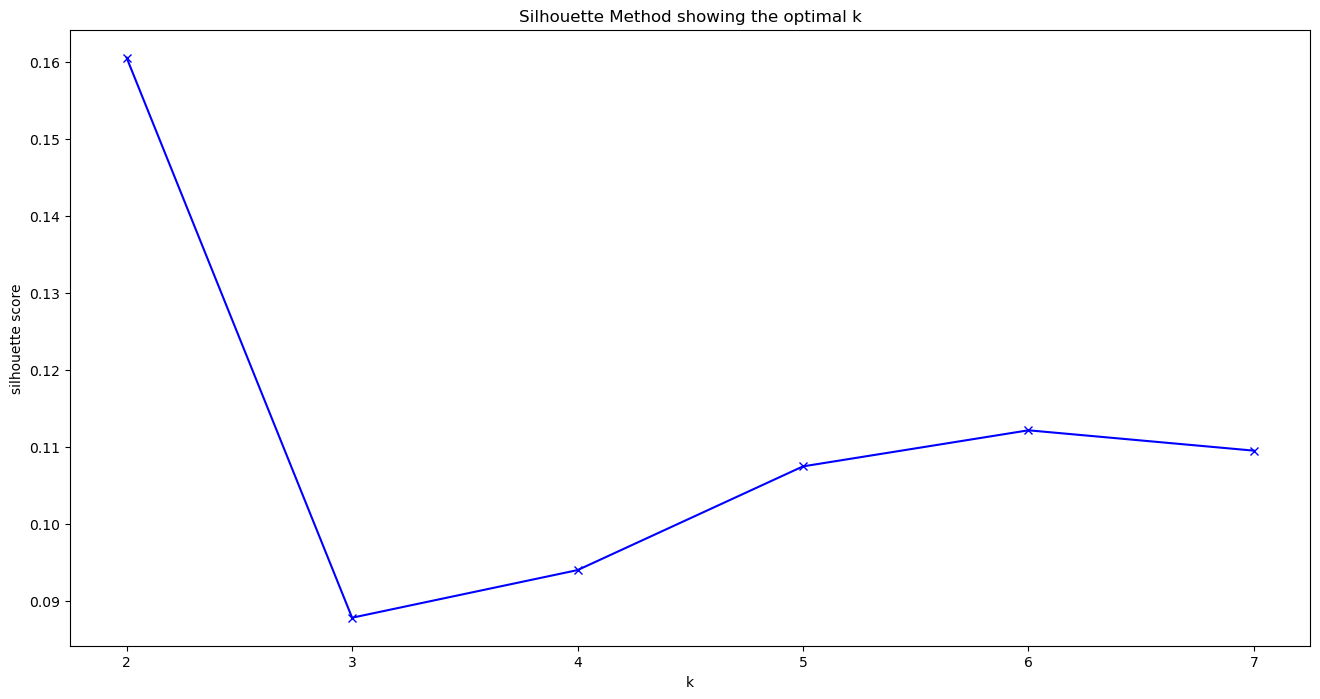

In [17]:
K = range(2, 8)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

C:\Users\vonke\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


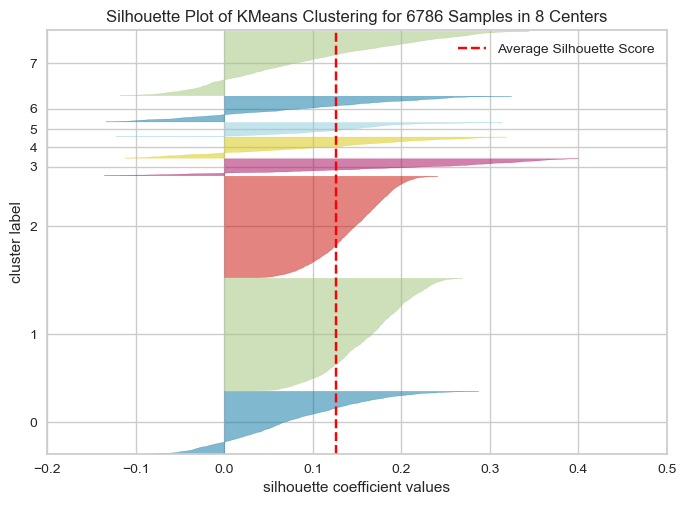

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 6786 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [18]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(8, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X_scaled_df)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Export df with clusters

In [ ]:
df_final = pd.concat([df, cluster_df["cluster"]], axis=1)

In [29]:
df_final.to_csv('df_final.csv', index=False) 

## Saving with pickle

In [20]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("Model/kmeans_8.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [21]:
def save(model, filename = 'filename.pickle'):
    with open(filename, "wb") as f:
        pickle.dump(model, f)

In [22]:
save(kmeans, "kmeans8.pickle")

In [23]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!")

In [24]:
load("kmeans8.pickle")

KMeans(n_clusters=7, n_init='auto', random_state=1234)

In [25]:
scaler= load(filename="Model/scaler.pickle")

In [26]:
kmeans_model = load(filename="Model/kmeans_8.pickle")

In [27]:
kmeans_model

KMeans(n_clusters=7, n_init='auto', random_state=1234)

In [28]:
scaler2 = load("Model/scaler.pickle")